In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import scipy.stats as st
import numpy as np
import requests
#from config import g_key


In [52]:
file_path = "MoviesOnStreamingPlatforms_updated.csv"

df = pd.read_csv(file_path)

df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [53]:
df.drop(columns=["Rotten Tomatoes","Directors","Type","Unnamed: 0"], inplace=True)

df.head()

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,1,0,0,0,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Western,"Italy,Spain,West Germany",Italian,161.0


In [54]:
complete_df = df.loc[~((df['IMDb'].isnull() )|(df['Genres'].isnull())|(df['Language'].isnull())|(df["Country"].isnull())|(df['Age'].isnull()))]

complete_df.shape

(7192, 13)

In [55]:
complete_df

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,1,0,0,0,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16726,16727,Richie Rich's Christmas Wish,1998,all,4.1,0,0,0,1,"Comedy,Family",United States,English,84.0
16727,16728,The Jungle Book: Mowgli's Story,1998,all,4.2,0,0,0,1,"Adventure,Family",United States,English,77.0
16737,16738,The Bears and I,1974,all,6.2,0,0,0,1,"Drama,Family",United States,English,89.0
16738,16739,Whispers: An Elephant's Tale,2000,all,5.0,0,0,0,1,"Adventure,Family",United States,English,72.0


## Country split for partial DataFrame with country_df -TEST-

In [56]:
# new data frame with selected columns to be analysed  
country_df = complete_df[["IMDb","Title","Year","Genres","Country"]]
country_df

,IMDb,Title,Year,Genres,Country
0,8.8,Inception,2010,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom"
1,8.7,The Matrix,1999,"Action,Sci-Fi",United States
2,8.5,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",United States
3,8.5,Back to the Future,1985,"Adventure,Comedy,Sci-Fi",United States
4,8.8,"The Good, the Bad and the Ugly",1966,Western,"Italy,Spain,West Germany"
...,...,...,...,...,...
16726,4.1,Richie Rich's Christmas Wish,1998,"Comedy,Family",United States
16727,4.2,The Jungle Book: Mowgli's Story,1998,"Adventure,Family",United States
16737,6.2,The Bears and I,1974,"Drama,Family",United States
16738,5.0,Whispers: An Elephant's Tale,2000,"Adventure,Family",United States


In [57]:
#Separate data from Country column
xplodecountry_df= country_df.assign(Country=df.Country.str.split(",")).explode('Country')
xplodecountry_df

,IMDb,Title,Year,Genres,Country
0,8.8,Inception,2010,"Action,Adventure,Sci-Fi,Thriller",United States
0,8.8,Inception,2010,"Action,Adventure,Sci-Fi,Thriller",United Kingdom
1,8.7,The Matrix,1999,"Action,Sci-Fi",United States
2,8.5,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",United States
3,8.5,Back to the Future,1985,"Adventure,Comedy,Sci-Fi",United States
...,...,...,...,...,...
16726,4.1,Richie Rich's Christmas Wish,1998,"Comedy,Family",United States
16727,4.2,The Jungle Book: Mowgli's Story,1998,"Adventure,Family",United States
16737,6.2,The Bears and I,1974,"Drama,Family",United States
16738,5.0,Whispers: An Elephant's Tale,2000,"Adventure,Family",United States


In [58]:
#Sorting data by descending order in IMDb rating column
sortxplodecountry_df= xplodecountry_df.sort_values('IMDb',ascending=False)
sortxplodecountry_df

,IMDb,Title,Year,Genres,Country
7491,9.1,Finding Family,2013,"Documentary,Family,History,War",Bosnia and Herzegovina
7491,9.1,Finding Family,2013,"Documentary,Family,History,War",United Kingdom
3560,9.0,The Dark Knight,2008,"Action,Crime,Drama,Thriller",United Kingdom
3560,9.0,The Dark Knight,2008,"Action,Crime,Drama,Thriller",United States
6840,8.9,Peter Gabriel: Secret World Live,1993,"Documentary,Music",Canada
...,...,...,...,...,...
13470,1.6,Izzie's Way Home,2016,"Animation,Adventure",Hong Kong
15735,1.6,The Legend of the Titanic,1999,"Animation,Family,Fantasy,Romance",Spain
13470,1.6,Izzie's Way Home,2016,"Animation,Adventure",United Kingdom
15556,1.5,Diamond Dawgs,2009,"Action,Crime,Drama",United States


In [59]:
#Sorting data by descendign order in IMDb rating column and ascending Country to guarantee different results than USA
sortxplodecountry2_df = xplodecountry_df.sort_values(by =['IMDb','Country'], ascending=[False,True])
sortxplodecountry2_df

,IMDb,Title,Year,Genres,Country
7491,9.1,Finding Family,2013,"Documentary,Family,History,War",Bosnia and Herzegovina
7491,9.1,Finding Family,2013,"Documentary,Family,History,War",United Kingdom
3560,9.0,The Dark Knight,2008,"Action,Crime,Drama,Thriller",United Kingdom
3560,9.0,The Dark Knight,2008,"Action,Crime,Drama,Thriller",United States
6840,8.9,Peter Gabriel: Secret World Live,1993,"Documentary,Music",Canada
...,...,...,...,...,...
15735,1.6,The Legend of the Titanic,1999,"Animation,Family,Fantasy,Romance",United States
15837,1.6,Life's a Jungle: Africa's Most Wanted,2012,"Animation,Family",United States
16631,1.6,Jonas Brothers: The Concert Experience,2009,"Documentary,Music",United States
15556,1.5,Diamond Dawgs,2009,"Action,Crime,Drama",United States


In [60]:
#Get Unique Values of a Column with drop_duplicates() for a specific column Title
sortxplodecountry2_df.drop_duplicates(subset=['Title'])

,IMDb,Title,Year,Genres,Country
7491,9.1,Finding Family,2013,"Documentary,Family,History,War",Bosnia and Herzegovina
3560,9.0,The Dark Knight,2008,"Action,Crime,Drama,Thriller",United Kingdom
6840,8.9,Peter Gabriel: Secret World Live,1993,"Documentary,Music",Canada
4829,8.9,The Mountain II,2016,"Action,Drama,War",Turkey
7643,8.8,Machine Gun Preacher Documentary,2014,Documentary,Australia
...,...,...,...,...,...
15735,1.6,The Legend of the Titanic,1999,"Animation,Family,Fantasy,Romance",Italy
15837,1.6,Life's a Jungle: Africa's Most Wanted,2012,"Animation,Family",United States
16631,1.6,Jonas Brothers: The Concert Experience,2009,"Documentary,Music",United States
15556,1.5,Diamond Dawgs,2009,"Action,Crime,Drama",United States


## Country split for full DataFrame with complete_df

In [61]:
#Do the same but for the full Data Frame
print("----------------------------")
print(f"Complete Country text split DataFrame")
print("----------------------------")
complete_df

----------------------------
Complete Country text split DataFrame
----------------------------


,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,1,0,0,0,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16726,16727,Richie Rich's Christmas Wish,1998,all,4.1,0,0,0,1,"Comedy,Family",United States,English,84.0
16727,16728,The Jungle Book: Mowgli's Story,1998,all,4.2,0,0,0,1,"Adventure,Family",United States,English,77.0
16737,16738,The Bears and I,1974,all,6.2,0,0,0,1,"Drama,Family",United States,English,89.0
16738,16739,Whispers: An Elephant's Tale,2000,all,5.0,0,0,0,1,"Adventure,Family",United States,English,72.0


In [62]:
#Separate data from Country column
xplodecountry_df= complete_df.assign(Country=df.Country.str.split(",")).explode('Country')
xplodecountry_df

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,1,0,0,0,"Action,Adventure,Sci-Fi,Thriller",United States,"English,Japanese,French",148.0
0,1,Inception,2010,13+,8.8,1,0,0,0,"Action,Adventure,Sci-Fi,Thriller",United Kingdom,"English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,"Adventure,Comedy,Sci-Fi",United States,English,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16726,16727,Richie Rich's Christmas Wish,1998,all,4.1,0,0,0,1,"Comedy,Family",United States,English,84.0
16727,16728,The Jungle Book: Mowgli's Story,1998,all,4.2,0,0,0,1,"Adventure,Family",United States,English,77.0
16737,16738,The Bears and I,1974,all,6.2,0,0,0,1,"Drama,Family",United States,English,89.0
16738,16739,Whispers: An Elephant's Tale,2000,all,5.0,0,0,0,1,"Adventure,Family",United States,English,72.0


In [63]:
#Sorting data by descendign order in IMDb rating column and ascending Country to guarantee different results than USA
sortcountry_df = xplodecountry_df.sort_values(by =['IMDb','Country'], ascending=[False,True])
sortcountry_df

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Genres,Country,Language,Runtime
7491,7492,Finding Family,2013,13+,9.1,0,0,1,0,"Documentary,Family,History,War",Bosnia and Herzegovina,"Bosnian,English",56.0
7491,7492,Finding Family,2013,13+,9.1,0,0,1,0,"Documentary,Family,History,War",United Kingdom,"Bosnian,English",56.0
3560,3561,The Dark Knight,2008,13+,9.0,0,1,0,0,"Action,Crime,Drama,Thriller",United Kingdom,"English,Mandarin",152.0
3560,3561,The Dark Knight,2008,13+,9.0,0,1,0,0,"Action,Crime,Drama,Thriller",United States,"English,Mandarin",152.0
6840,6841,Peter Gabriel: Secret World Live,1993,all,8.9,0,0,1,0,"Documentary,Music",Canada,English,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15735,15736,The Legend of the Titanic,1999,all,1.6,0,0,1,0,"Animation,Family,Fantasy,Romance",United States,Italian,84.0
15837,15838,Life's a Jungle: Africa's Most Wanted,2012,all,1.6,0,0,1,0,"Animation,Family",United States,English,101.0
16631,16632,Jonas Brothers: The Concert Experience,2009,all,1.6,0,0,0,1,"Documentary,Music",United States,English,76.0
15556,15557,Diamond Dawgs,2009,18+,1.5,0,0,1,0,"Action,Crime,Drama",United States,English,90.0


In [64]:
#Get Unique Values of a Column with drop_duplicates() for a specific column Title
dropcountry_df= sortcountry_df.drop_duplicates(subset=['Title'])
dropcountry_df

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Genres,Country,Language,Runtime
7491,7492,Finding Family,2013,13+,9.1,0,0,1,0,"Documentary,Family,History,War",Bosnia and Herzegovina,"Bosnian,English",56.0
3560,3561,The Dark Knight,2008,13+,9.0,0,1,0,0,"Action,Crime,Drama,Thriller",United Kingdom,"English,Mandarin",152.0
6840,6841,Peter Gabriel: Secret World Live,1993,all,8.9,0,0,1,0,"Documentary,Music",Canada,English,102.0
4829,4830,The Mountain II,2016,all,8.9,0,0,1,0,"Action,Drama,War",Turkey,Turkish,135.0
7643,7644,Machine Gun Preacher Documentary,2014,16+,8.8,0,0,1,0,Documentary,Australia,English,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15735,15736,The Legend of the Titanic,1999,all,1.6,0,0,1,0,"Animation,Family,Fantasy,Romance",Italy,Italian,84.0
15837,15838,Life's a Jungle: Africa's Most Wanted,2012,all,1.6,0,0,1,0,"Animation,Family",United States,English,101.0
16631,16632,Jonas Brothers: The Concert Experience,2009,all,1.6,0,0,0,1,"Documentary,Music",United States,English,76.0
15556,15557,Diamond Dawgs,2009,18+,1.5,0,0,1,0,"Action,Crime,Drama",United States,English,90.0


## Country drop duplicates creating one Service column

In [65]:
#Full Data Frame with unified Service column
print("----------------------------")
print(f"Complete Country adding Service column")
print("----------------------------")
dropcountry_df

----------------------------
Complete Country adding Service column
----------------------------


,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Genres,Country,Language,Runtime
7491,7492,Finding Family,2013,13+,9.1,0,0,1,0,"Documentary,Family,History,War",Bosnia and Herzegovina,"Bosnian,English",56.0
3560,3561,The Dark Knight,2008,13+,9.0,0,1,0,0,"Action,Crime,Drama,Thriller",United Kingdom,"English,Mandarin",152.0
6840,6841,Peter Gabriel: Secret World Live,1993,all,8.9,0,0,1,0,"Documentary,Music",Canada,English,102.0
4829,4830,The Mountain II,2016,all,8.9,0,0,1,0,"Action,Drama,War",Turkey,Turkish,135.0
7643,7644,Machine Gun Preacher Documentary,2014,16+,8.8,0,0,1,0,Documentary,Australia,English,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15735,15736,The Legend of the Titanic,1999,all,1.6,0,0,1,0,"Animation,Family,Fantasy,Romance",Italy,Italian,84.0
15837,15838,Life's a Jungle: Africa's Most Wanted,2012,all,1.6,0,0,1,0,"Animation,Family",United States,English,101.0
16631,16632,Jonas Brothers: The Concert Experience,2009,all,1.6,0,0,0,1,"Documentary,Music",United States,English,76.0
15556,15557,Diamond Dawgs,2009,18+,1.5,0,0,1,0,"Action,Crime,Drama",United States,English,90.0


## Now let's work with every movie instead of only the unique ones...¶


In [66]:
dropcountry_df.columns

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Netflix', 'Hulu', 'Prime Video',
       'Disney+', 'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')

In [67]:
dropcountry_df["Total Services"] = dropcountry_df["Netflix"]+dropcountry_df["Hulu"]+dropcountry_df["Prime Video"]+dropcountry_df["Disney+"]

uniquecountry_movies_df = dropcountry_df[dropcountry_df["Total Services"]<2]
uniquecountry_movies_df

/Users/leoalvarado/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Genres,Country,Language,Runtime,Total Services
7491,7492,Finding Family,2013,13+,9.1,0,0,1,0,"Documentary,Family,History,War",Bosnia and Herzegovina,"Bosnian,English",56.0,1
3560,3561,The Dark Knight,2008,13+,9.0,0,1,0,0,"Action,Crime,Drama,Thriller",United Kingdom,"English,Mandarin",152.0,1
6840,6841,Peter Gabriel: Secret World Live,1993,all,8.9,0,0,1,0,"Documentary,Music",Canada,English,102.0,1
4829,4830,The Mountain II,2016,all,8.9,0,0,1,0,"Action,Drama,War",Turkey,Turkish,135.0,1
7643,7644,Machine Gun Preacher Documentary,2014,16+,8.8,0,0,1,0,Documentary,Australia,English,73.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15735,15736,The Legend of the Titanic,1999,all,1.6,0,0,1,0,"Animation,Family,Fantasy,Romance",Italy,Italian,84.0,1
15837,15838,Life's a Jungle: Africa's Most Wanted,2012,all,1.6,0,0,1,0,"Animation,Family",United States,English,101.0,1
16631,16632,Jonas Brothers: The Concert Experience,2009,all,1.6,0,0,0,1,"Documentary,Music",United States,English,76.0,1
15556,15557,Diamond Dawgs,2009,18+,1.5,0,0,1,0,"Action,Crime,Drama",United States,English,90.0,1


In [68]:
uniquecountry_movies_df.columns

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Netflix', 'Hulu', 'Prime Video',
       'Disney+', 'Genres', 'Country', 'Language', 'Runtime',
       'Total Services'],
      dtype='object')

In [69]:
uniquecountry_movies_df = pd.melt(uniquecountry_movies_df, id_vars = ['ID', 'Title', 'Year', 'Age', 'IMDb', 'Genres', 'Country',
                                                                      'Language', 'Runtime', "Total Services"], 
                      value_vars= ['Netflix', 'Hulu', 'Prime Video','Disney+'], var_name = "Service")

#uniquecountry_movies_df

In [70]:

uniquecountry_movies_df = uniquecountry_movies_df[uniquecountry_movies_df["value"]==1]

uniquecountry_movies_df.drop(columns=["value"], inplace=True)

uniquecountry_movies_df

,ID,Title,Year,Age,IMDb,Genres,Country,Language,Runtime,Total Services,Service
6,1,Inception,2010,13+,8.8,"Action,Adventure,Sci-Fi,Thriller",United Kingdom,"English,Japanese,French",148.0,1,Netflix
10,2,The Matrix,1999,18+,8.7,"Action,Sci-Fi",United States,English,136.0,1,Netflix
15,1539,Luciano Mellera: Infantiloide,2018,13+,8.6,Comedy,Argentina,Spanish,66.0,1,Netflix
16,2196,Hikaru Utada Laughter in the Dark Tour 2018,2019,all,8.6,Music,Japan,Japanese,141.0,1,Netflix
26,48,Senna,2010,13+,8.5,"Documentary,Biography,Sport",France,"English,Portuguese,French,Japanese",106.0,1,Netflix
...,...,...,...,...,...,...,...,...,...,...,...
26887,16638,Inspector Gadget 2,2003,all,3.4,"Action,Comedy,Crime,Family,Sci-Fi",United States,English,89.0,1,Disney+
26889,16672,George of the Jungle 2,2003,7+,3.3,"Adventure,Comedy,Family",Australia,English,87.0,1,Disney+
27030,16688,Kazaam,1996,7+,3.0,"Comedy,Family,Fantasy,Musical",United States,English,93.0,1,Disney+
27180,16526,Hannah Montana & Miley Cyrus: Best of Both Wor...,2008,all,2.4,"Documentary,Music",United States,English,74.0,1,Disney+


In [71]:
uniquecountry_movies_df.loc[uniquecountry_movies_df['Service']=='Disney+']


,ID,Title,Year,Age,IMDb,Genres,Country,Language,Runtime,Total Services,Service
20447,16214,Star Wars: The Empire Strikes Back,1980,7+,8.7,"Action,Adventure,Fantasy,Sci-Fi",United States,English,124.0,1,Disney+
20457,16213,Star Wars: A New Hope,1977,7+,8.6,"Action,Adventure,Fantasy,Sci-Fi",United States,English,121.0,1,Disney+
20464,16215,The Lion King,1994,all,8.5,"Animation,Adventure,Drama,Family,Musical",United Kingdom,"English,Xhosa,Zulu,French,Spanish",118.0,1,Disney+
20472,16442,Newsies: The Broadway Musical,2017,13+,8.5,Musical,United States,English,149.0,1,Disney+
20492,16217,Avengers: Endgame,2019,13+,8.4,"Action,Adventure,Drama,Sci-Fi",United States,"English,Japanese,Xhosa,German",181.0,1,Disney+
...,...,...,...,...,...,...,...,...,...,...,...
26887,16638,Inspector Gadget 2,2003,all,3.4,"Action,Comedy,Crime,Family,Sci-Fi",United States,English,89.0,1,Disney+
26889,16672,George of the Jungle 2,2003,7+,3.3,"Adventure,Comedy,Family",Australia,English,87.0,1,Disney+
27030,16688,Kazaam,1996,7+,3.0,"Comedy,Family,Fantasy,Musical",United States,English,93.0,1,Disney+
27180,16526,Hannah Montana & Miley Cyrus: Best of Both Wor...,2008,all,2.4,"Documentary,Music",United States,English,74.0,1,Disney+


([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

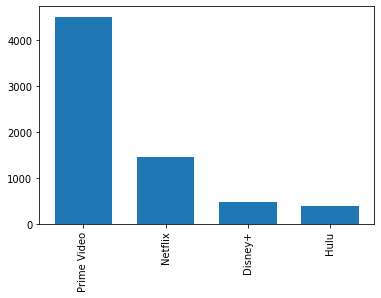

In [72]:
#graficar cantidad de peliculas por servicio 

streaming_service_bio = uniquecountry_movies_df['Service'].value_counts()
x_value = streaming_service_bio.index.values  
y_value= streaming_service_bio.values


plt.bar(x_value, y_value, width=.7 )
plt.xticks(rotation=90) 


In [73]:
# acomodar genero  
#print(uniquecountry_movies_df['Genres'].unique())
#x = uniquecountry_movies_df['Genres'].unique() 



#genre_df= uniquecountry_movies_df.assign(Genres=df.Genres.str.split(","))#.explode('Genres')


uniquecountry_movies_df['Genres']= uniquecountry_movies_df['Genres'].str.split(',')
uniquecountry_movies_df = uniquecountry_movies_df.explode('Genres')
uniquecountry_movies_df






#uniquecountry_movies_df = pd.melt(uniquecountry_movies_df, id_vars = ['ID', 'Title', 'Year', 'Age', 'IMDb', 'Service', 'Country',
#                                                                      'Language', 'Runtime', "Total Services"], 
#                      value_vars= ['Netflix', 'Hulu', 'Prime Video','Disney+'], var_name = "Genre")

,ID,Title,Year,Age,IMDb,Genres,Country,Language,Runtime,Total Services,Service
6,1,Inception,2010,13+,8.8,Action,United Kingdom,"English,Japanese,French",148.0,1,Netflix
6,1,Inception,2010,13+,8.8,Adventure,United Kingdom,"English,Japanese,French",148.0,1,Netflix
6,1,Inception,2010,13+,8.8,Sci-Fi,United Kingdom,"English,Japanese,French",148.0,1,Netflix
6,1,Inception,2010,13+,8.8,Thriller,United Kingdom,"English,Japanese,French",148.0,1,Netflix
10,2,The Matrix,1999,18+,8.7,Action,United States,English,136.0,1,Netflix
...,...,...,...,...,...,...,...,...,...,...,...
27030,16688,Kazaam,1996,7+,3.0,Musical,United States,English,93.0,1,Disney+
27180,16526,Hannah Montana & Miley Cyrus: Best of Both Wor...,2008,all,2.4,Documentary,United States,English,74.0,1,Disney+
27180,16526,Hannah Montana & Miley Cyrus: Best of Both Wor...,2008,all,2.4,Music,United States,English,74.0,1,Disney+
27241,16632,Jonas Brothers: The Concert Experience,2009,all,1.6,Documentary,United States,English,76.0,1,Disney+


In [75]:
genre_df = uniquecountry_movies_df


In [76]:
genre_disney_df = genre_df.loc[(genre_df["Service"]=="Disney+")]
genre_disney_df 

,ID,Title,Year,Age,IMDb,Genres,Country,Language,Runtime,Total Services,Service
20447,16214,Star Wars: The Empire Strikes Back,1980,7+,8.7,Action,United States,English,124.0,1,Disney+
20447,16214,Star Wars: The Empire Strikes Back,1980,7+,8.7,Adventure,United States,English,124.0,1,Disney+
20447,16214,Star Wars: The Empire Strikes Back,1980,7+,8.7,Fantasy,United States,English,124.0,1,Disney+
20447,16214,Star Wars: The Empire Strikes Back,1980,7+,8.7,Sci-Fi,United States,English,124.0,1,Disney+
20457,16213,Star Wars: A New Hope,1977,7+,8.6,Action,United States,English,121.0,1,Disney+
...,...,...,...,...,...,...,...,...,...,...,...
27030,16688,Kazaam,1996,7+,3.0,Musical,United States,English,93.0,1,Disney+
27180,16526,Hannah Montana & Miley Cyrus: Best of Both Wor...,2008,all,2.4,Documentary,United States,English,74.0,1,Disney+
27180,16526,Hannah Montana & Miley Cyrus: Best of Both Wor...,2008,all,2.4,Music,United States,English,74.0,1,Disney+
27241,16632,Jonas Brothers: The Concert Experience,2009,all,1.6,Documentary,United States,English,76.0,1,Disney+


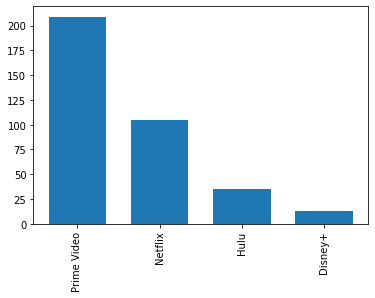

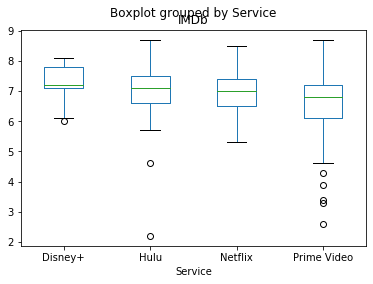

In [77]:
#pokemon_df.loc[(pokemon_df['Type 1']=='Grass' )

biography_df = genre_df.loc[genre_df['Genres']=='Biography']
biography_df 

streaming_service_bio = biography_df['Service'].value_counts()
x_value = streaming_service_bio.index.values  
y_value= streaming_service_bio.values


plt.bar(x_value, y_value, width=.7 )
plt.xticks(rotation=90)  

#df.boxplot(by ='day', column =['total_bill'], grid = False) 

biography_df.boxplot(by='Service', column=['IMDb'],grid = False)
                               
#boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3'])

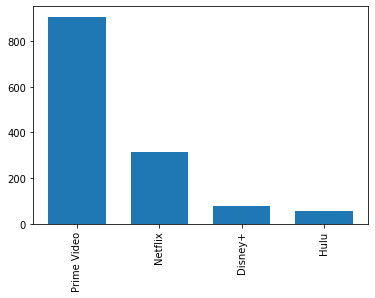

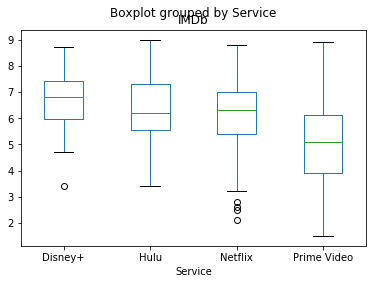

In [78]:
action_df = genre_df.loc[genre_df['Genres']=='Action']


streaming_service_action = action_df['Service'].value_counts()
x_value = streaming_service_action.index.values  
y_value= streaming_service_action.values


plt.bar(x_value, y_value, width=.7 )
plt.xticks(rotation=90)  

#df.boxplot(by ='day', column =['total_bill'], grid = False) 

action_df.boxplot(by='Service', column=['IMDb'],grid = False)
                               
#boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3'])

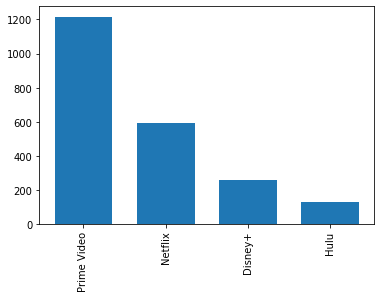

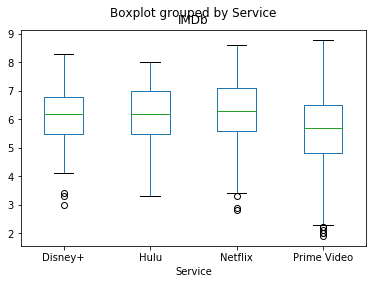

In [82]:
comedy_df = genre_df.loc[genre_df['Genres']=='Comedy']
comedy_df 

streaming_service_comedy = comedy_df['Service'].value_counts()
x_value = streaming_service_comedy.index.values  
y_value=streaming_service_comedy.values


plt.bar(x_value, y_value, width=.7 )
plt.xticks(rotation=90)  

#df.boxplot(by ='day', column =['total_bill'], grid = False) 

comedy_df.boxplot(by='Service', column=['IMDb'],grid = False)
                               
#boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3'])

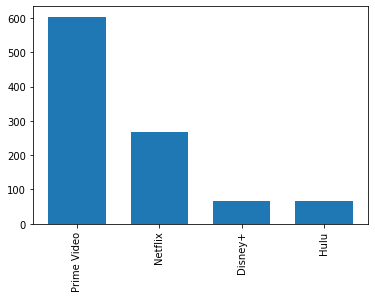

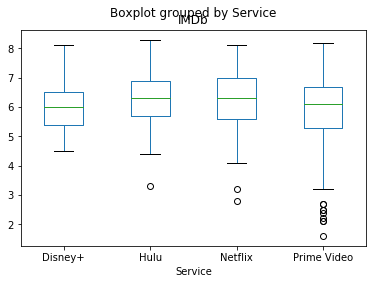

In [83]:
romance_df = genre_df.loc[genre_df['Genres']=='Romance']
romance_df 

streaming_service_romance = romance_df ['Service'].value_counts()
x_value = streaming_service_romance.index.values  
y_value= streaming_service_romance.values


plt.bar(x_value, y_value, width=.7 )
plt.xticks(rotation=90)  

#df.boxplot(by ='day', column =['total_bill'], grid = False) 

romance_df.boxplot(by='Service', column=['IMDb'],grid = False)
                               
#boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3'])


In [ ]:
horror_df = genre_df.loc[genre_df['Genres']=='Horror']
horror_df 

streaming_service_horror = horror_df ['Service'].value_counts()
x_value = streaming_service_horror.index.values  
y_value= streaming_service_horror.values


plt.bar(x_value, y_value, width=.7 )
plt.xticks(rotation=90)  
plt.title('Quantity of Horror movies by platform')

#df.boxplot(by ='day', column =['total_bill'], grid = False) 

horror_df.boxplot(by='Service', column=['IMDb'],grid = False)
                               
#boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3'])



In [ ]:
family_df = genre_df.loc[genre_df['Genres']=='Family']
family_df 

streaming_service_family = family_df['Service'].value_counts()
x_value = streaming_service_family.index.values  
y_value= streaming_service_family.values


plt.bar(x_value, y_value, width=.7 )
plt.xticks(rotation=90)  

#df.boxplot(by ='day', column =['total_bill'], grid = False) 

horror_df.boxplot(by='Service', column=['IMDb'],grid = False)
title='IMDB Rating by platiform'
                               
#boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3'])

